#Import all the required libraries.

In [ ]:
!pip install catboost
!pip install pytorch_tabnet
!pip install tpot
from tpot import TPOTClassifier
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, r2_score,mean_absolute_error,a
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from tpot import TPOTClassifier
from sklearn.cluster import DBSCAN
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#Loading Dataset.


In [ ]:
df=pd.read_csv("/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


#Data Preprocess

In [ ]:
df.shape

(2966, 8)

In [ ]:
df.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
9,21,Female,Computer Science,1,6,1,0,0


#Statistics Description.


In [ ]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


#Changing Gender column to Numericals.

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df)

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22       1  Electronics And Communication            1     8       1   
1      21       0               Computer Science            0     7       1   
2      22       0         Information Technology            1     6       0   
3      21       1         Information Technology            0     8       0   
4      22       1                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23       1         Information Technology            0     7       0   
2962   23       1                     Mechanical            1     7       1   
2963   22       1         Information Technology            1     7       0   
2964   22       1               Computer Science            1     7       0   
2965   23       1                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0           

#Stream Mapping

In [ ]:
Stream_mapping = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Mechanical': 2,
    'Civil': 3,
    'Information Technology': 4,
    'Electrical': 5
}

df['Stream'] = df['Stream'].map(Stream_mapping)
print(df)

      Age  Gender  Stream  Internships  CGPA  Hostel  HistoryOfBacklogs  \
0      22       1       0            1     8       1                  1   
1      21       0       1            0     7       1                  1   
2      22       0       4            1     6       0                  0   
3      21       1       4            0     8       0                  1   
4      22       1       2            0     8       1                  0   
...   ...     ...     ...          ...   ...     ...                ...   
2961   23       1       4            0     7       0                  0   
2962   23       1       2            1     7       1                  0   
2963   22       1       4            1     7       0                  0   
2964   22       1       1            1     7       0                  0   
2965   23       1       3            0     8       0                  0   

      PlacedOrNot  
0               1  
1               1  
2               1  
3               1  

#Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


#Counting NO. of rows.


In [ ]:
df.count()

Age                  2966
Gender               2966
Stream               2966
Internships          2966
CGPA                 2966
Hostel               2966
HistoryOfBacklogs    2966
PlacedOrNot          2966
dtype: int64

In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.dtypes

Age                  int64
Gender               int64
Stream               int64
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64
dtype: object

In [ ]:
df.isnull()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


#Data Visualisation.

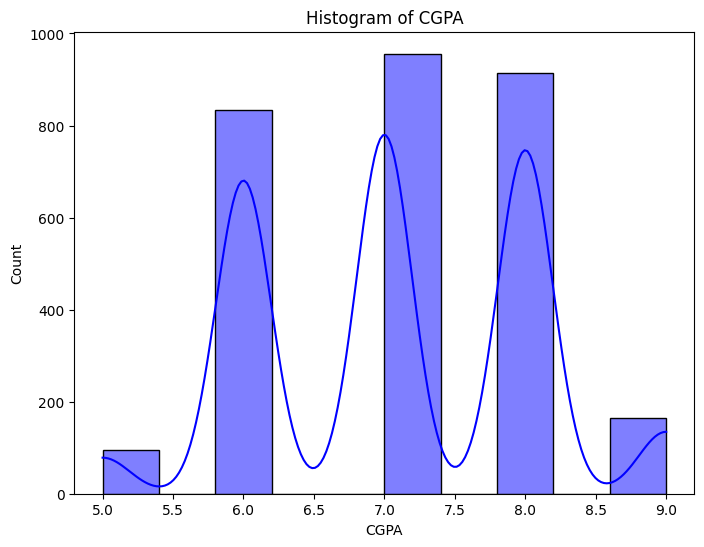

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CGPA'], bins=10, kde=True, color='blue')
plt.xlabel('CGPA')
plt.title('Histogram of CGPA')
plt.show()

<ipython-input-14-e4f3183a0a55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stream', data=df, palette='muted')


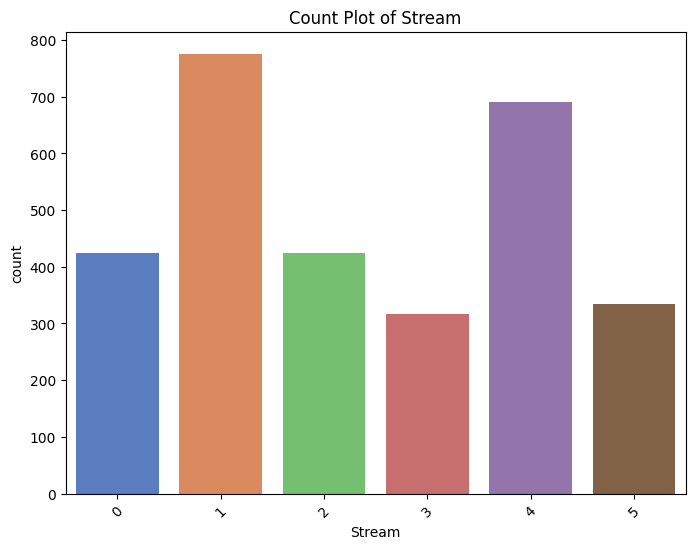

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stream', data=df, palette='muted')
plt.title('Count Plot of Stream')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''# Visualization - Pair Plot
sns.pairplot(df, hue='PlacedOrNot', diag_kind='hist')
plt.suptitle('Pair Plot for the column placedornot', y=1.02)
plt.show()'''

"# Visualization - Pair Plot\nsns.pairplot(df, hue='PlacedOrNot', diag_kind='hist')\nplt.suptitle('Pair Plot for the column placedornot', y=1.02)\nplt.show()"

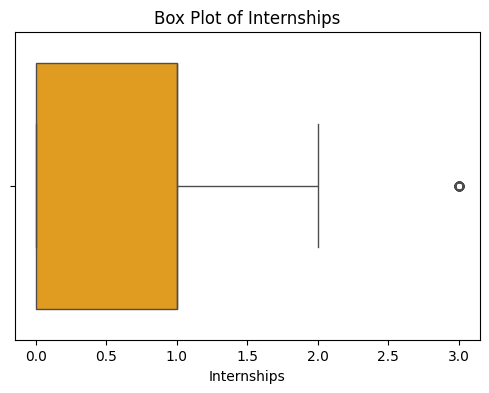

In [ ]:
# Visualization - Box Plot for 'Internships'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Internships', data=df, color='orange')
plt.xlabel('Internships')
plt.title('Box Plot of Internships')
plt.show()

#Model Selection

In [ ]:
X = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

#Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by scaling them
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Evaluation:")
print(accuracy*100)


Model Evaluation:
76.76767676767676


#Neural Networks

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print("Model Evaluation:")
print(f'Accuracy: {accuracy*100}')

Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 0.5953 - accuracy: 0.6895 - val_loss: 0.5088 - val_accuracy: 0.7789
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.7886 - val_loss: 0.4462 - val_accuracy: 0.7747
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8166 - val_loss: 0.4166 - val_accuracy: 0.7811
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8387 - val_loss: 0.3889 - val_accuracy: 0.8126
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8471 - val_loss: 0.3712 - val_accuracy: 0.8211
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8503 - val_loss: 0.3586 - val_accuracy: 0.8295
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8550 - val_loss: 0.3527 - val_accuracy: 0.8316
Epoch 8/10
60/60 [==

#Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print('Accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model Evaluation:
Accuracy score with 10 decision-trees : 88.8889


#Naïve Bayes

In [ ]:
data = pd.read_csv('collegePlace.csv')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Stream'] = label_encoder.fit_transform(data['Stream'])
X = data[['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']]
y = data['PlacedOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Evaluation:")
print("Accuracy:", accuracy*100)

Model Evaluation:
Accuracy: 78.61952861952862


#Gradient Boosting

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")

Model Evaluation:
Accuracy: 88.72%


#SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")

Model Evaluation:
Accuracy: 73.40%


#XGBoost


In [ ]:
# Load the dataset
data = pd.read_csv('collegePlace.csv')

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Stream'] = label_encoder.fit_transform(data['Stream'])

# Split the data into features (X) and target (y)
X = data[['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']]
y = data['PlacedOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
xgb_model = XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 88.89%


#Cat Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss')

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = catboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


0:	learn: 0.5705434	total: 47.5ms	remaining: 47.5s
1:	learn: 0.4950192	total: 49.3ms	remaining: 24.6s
2:	learn: 0.4402412	total: 51ms	remaining: 16.9s
3:	learn: 0.3985750	total: 52.7ms	remaining: 13.1s
4:	learn: 0.3743305	total: 53.8ms	remaining: 10.7s
5:	learn: 0.3571780	total: 55ms	remaining: 9.11s
6:	learn: 0.3434973	total: 56.2ms	remaining: 7.97s
7:	learn: 0.3325430	total: 57.4ms	remaining: 7.11s
8:	learn: 0.3249452	total: 58.6ms	remaining: 6.45s
9:	learn: 0.3177580	total: 59.7ms	remaining: 5.91s
10:	learn: 0.3113916	total: 60.9ms	remaining: 5.48s
11:	learn: 0.3058311	total: 62.1ms	remaining: 5.11s
12:	learn: 0.3015860	total: 63.4ms	remaining: 4.82s
13:	learn: 0.2974156	total: 64.8ms	remaining: 4.57s
14:	learn: 0.2937583	total: 66.2ms	remaining: 4.34s
15:	learn: 0.2901154	total: 67.6ms	remaining: 4.16s
16:	learn: 0.2868411	total: 68.9ms	remaining: 3.98s
17:	learn: 0.2841133	total: 70.2ms	remaining: 3.83s
18:	learn: 0.2819565	total: 71.5ms	remaining: 3.69s
19:	learn: 0.2807516	total

#Tab Net

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a TabNetClassifier and train the model
clf = TabNetClassifier()
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], patience=10, max_epochs=100)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy*100)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.81117 | val_0_auc: 0.77557 |  0:00:00s
epoch 1  | loss: 0.57528 | val_0_auc: 0.80933 |  0:00:00s
epoch 2  | loss: 0.52757 | val_0_auc: 0.83132 |  0:00:00s
epoch 3  | loss: 0.46028 | val_0_auc: 0.83164 |  0:00:00s
epoch 4  | loss: 0.41978 | val_0_auc: 0.84932 |  0:00:00s
epoch 5  | loss: 0.40515 | val_0_auc: 0.87683 |  0:00:00s
epoch 6  | loss: 0.39021 | val_0_auc: 0.88373 |  0:00:01s
epoch 7  | loss: 0.37374 | val_0_auc: 0.88794 |  0:00:01s
epoch 8  | loss: 0.36333 | val_0_auc: 0.89148 |  0:00:01s
epoch 9  | loss: 0.35647 | val_0_auc: 0.89713 |  0:00:01s
epoch 10 | loss: 0.3485  | val_0_auc: 0.89914 |  0:00:01s
epoch 11 | loss: 0.34355 | val_0_auc: 0.89787 |  0:00:01s
epoch 12 | loss: 0.3347  | val_0_auc: 0.89816 |  0:00:01s
epoch 13 | loss: 0.3367  | val_0_auc: 0.89609 |  0:00:02s
epoch 14 | loss: 0.33095 | val_0_auc: 0.89798 |  0:00:02s
epoch 15 | loss: 0.32344 | val_0_auc: 0.89945 |  0:00:02s
epoch 16 | loss: 0.32225 | val_0_auc: 0.89721 |  0:00:02s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


#AutoML

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TPOTClassifier
tpot = TPOTClassifier(
    generations=5,  # Number of generations to run the genetic algorithm
    population_size=20,  # Number of individuals to include in each generation
    verbosity=2,  # Controls the verbosity of TPOT's output
    random_state=42,  # Random state for reproducibility
    config_dict='TPOT sparse',  # You can specify different TPOT configurations
    n_jobs=-1,  # Use all available CPU cores
)

# Fit the TPOTClassifier to your training data
tpot.fit(X_train, y_train)

# Evaluate the trained model on your testing data
y_pred = tpot.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8811174772373974

Generation 2 - Current best internal CV score: 0.8823833000222073

Generation 3 - Current best internal CV score: 0.8853342216300245

Generation 4 - Current best internal CV score: 0.8857570508549856

Generation 5 - Current best internal CV score: 0.8857570508549856

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=13, n_estimators=100)
Accuracy: 0.8838383838383839


#Comparing all the ML Algorithms

In [ ]:
data = pd.read_csv('collegePlace.csv')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Stream'] = label_encoder.fit_transform(data['Stream'])
X = data[['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']]
y = data['PlacedOrNot']
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Neural Network', MLPClassifier(max_iter=10000)),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('CatBoost', CatBoostClassifier()),  # CatBoost
    ('XGBoost', XGBClassifier()),  # XGBoost
]

# Add TPOT model configuration (you can customize it)
tpot_config = {
    'generations': 5,
    'population_size': 20,
    'verbosity': 2,
    'random_state': 42,
    'config_dict': 'TPOT sparse',
    'n_jobs': -1,
}

# Dictionary to store classification reports
classification_reports = {}

# Fit and evaluate all classifiers
for classifier_name, classifier in classifiers:
    if classifier_name == 'TPOT':
        # TPOTClassifier
        tpot = TPOTClassifier(**tpot_config)
        tpot.fit(X_train, y_train)
        y_pred = tpot.predict(X_test)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

    classification_report_result = classification_report(y_test, y_pred)
    classification_reports[classifier_name] = classification_report_result

# Plot the bar chart
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
plt.figure(figsize=(12, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=0)
for i, bar in enumerate(bars):
    bar.set_color(colors[i])
plt.tight_layout()
plt.show()

# Print classification report for each classifier
for classifier_name, classification_report_result in classification_reports.items():
    print(f"Classification Report for {classifier_name}:\n", classification_report_result)


Learning rate set to 0.014897
0:	learn: 0.6717549	total: 1.39ms	remaining: 1.39s
1:	learn: 0.6531073	total: 2.84ms	remaining: 1.42s
2:	learn: 0.6347343	total: 4.2ms	remaining: 1.4s
3:	learn: 0.6178947	total: 5.55ms	remaining: 1.38s
4:	learn: 0.6019188	total: 6.89ms	remaining: 1.37s
5:	learn: 0.5868366	total: 8.32ms	remaining: 1.38s
6:	learn: 0.5731631	total: 9.73ms	remaining: 1.38s
7:	learn: 0.5608263	total: 11ms	remaining: 1.37s
8:	learn: 0.5477905	total: 12.3ms	remaining: 1.36s
9:	learn: 0.5361106	total: 13.6ms	remaining: 1.35s
10:	learn: 0.5244960	total: 14.9ms	remaining: 1.34s
11:	learn: 0.5128530	total: 16.2ms	remaining: 1.34s
12:	learn: 0.5026213	total: 17.6ms	remaining: 1.33s
13:	learn: 0.4931472	total: 18.9ms	remaining: 1.33s
14:	learn: 0.4850387	total: 20.2ms	remaining: 1.32s
15:	learn: 0.4769930	total: 21.5ms	remaining: 1.32s
16:	learn: 0.4683479	total: 22.9ms	remaining: 1.32s
17:	learn: 0.4597633	total: 24.3ms	remaining: 1.32s
18:	learn: 0.4522473	total: 25.6ms	remaining: 1.

NameError: name 'accuracies' is not defined

<Figure size 1200x600 with 0 Axes>

#Deployment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LogisticRegression()
model.feature_names_in_ = ['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']

#Training the model
model.fit(X_train, y_train)
model_filename = 'model.pkl'
joblib.dump(model, model_filename)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

import joblib

# Load the trained model
model = joblib.load('model.pkl')

def predict_placement(age, gender, stream, internships, cgpa, hostel, history_of_backlogs):
    input_data = [
        age, gender, stream, internships, cgpa, hostel, history_of_backlogs
    ]
    # Predict placement using the loaded model
    placement_prediction = model.predict([input_data])[0]
    if placement_prediction == 1:
        print("\n 0\033[1mCongratulations! You are eligible to get placed.\033[0m")
    else:
        print("Oops! You are not placed. Your weaker zones for placement improvement:")

        if age < 20:
            print("- Your age suggests that you are still in the early stages of your career. Focus on skill development and gaining experience.")
        elif age >= 20 and age < 25:
            print("- You are at a good age to start building your career. Consider gaining more internship experience and improving your academic performance.")
        else:
            print("- While age can be an advantage in some cases, consider gaining more industry experience to offset the age factor.")

        if internships == 0:
            print("- Lack of internship experience may affect your employability. Look for internship opportunities to enhance your resume.")
        elif internships > 0 and internships < 3:
            print("- Your internship experience is a positive factor. Consider gaining more diverse internship experiences to strengthen your profile.")
        else:
            print("- Your extensive internship experience is a significant strength. Highlight specific projects and skills developed during your internships.")

        if cgpa < 7.0:
            print("- Your CGPA is below the desired threshold for many employers. Focus on improving your academic performance by attending additional classes and seeking help from professors.")
        elif cgpa >= 7.0 and cgpa < 8.0:
            print("- Your CGPA is good but has room for improvement. Aim for higher grades in your courses and participate in academic research projects.")
        else:
            print("- Your high CGPA is a significant strength. Continue to excel in your academics and consider sharing your knowledge by tutoring other students.")

        if hostel == 0:
            print("- Consider relocating to a hostel, as it can provide better access to opportunities, peer collaboration, and networking. Living on campus can enhance your overall college experience.")
        else:
            print("- Hostel accommodation can be an advantage for networking and participation in extracurricular activities. Engage actively with fellow hostel mates and participate in college events.")

        if history_of_backlogs > 3:
            print("- A high number of backlogs may impact your eligibility for placements. Prioritize your studies, seek academic support, and ensure timely completion of pending courses.")
        else:
            print("- Your lower number of backlogs is a positive factor. Keep up the good work by maintaining consistent academic performance.")

while True:
    print("\nEnter the following details for placement prediction:\n")
    age = int(input("Enter the Age: "))
    gender = int(input("Enter Gender (Male-1 / Female-0): "))
    print("\nStream")
    print("Electronics And Communication: 0")
    print("Computer Science: 1")
    print("Mechanical: 2")
    print("Civil: 3")
    print("Information Technology: 4")
    print("Electrical: 5")

    stream = int(input("\nEnter Stream: "))
    internships = int(input("Enter No. Of Internships done: "))
    cgpa = float(input("Enter CGPA: "))
    hostel = int(input("Enter hostel or not (Yes-1 / No-0): "))
    history_of_backlogs = int(input("Enter No. of Backlogs: "))

    predict_placement(age, gender, stream, internships, cgpa, hostel, history_of_backlogs)

    choice = int(input("\nDo you want to enter another prediction?\n1-Yes\n0-No: "))
    if choice != 1:
        break